<a href="https://colab.research.google.com/github/naimn2/deep-learning/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to skripsi: [Google Docs](https://docs.google.com/document/d/1J6A-4iklErjKS2BWADm1Y4fV-itJjYL5g3D3iVRfxF0/edit?usp=sharing "ANALISIS PERBANDINGAN KLASIFIKASI REGRESI LOGISTIK DAN SVM PADA DATA SPAM")

In [1]:
# import lib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm
import seaborn as sns


from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from google.colab import files
uploaded = files.upload()

#H07117171007-Muhammad Muflihun Naim
#H071171504-Muhammad Arizki
#H071171527-FarhanRamdhani
#IlmuKomputer-UH
%matplotlib inline


Saving spambase.csv to spambase.csv


In [0]:
#plot color
cTrain = '#665178'
cTest = '#A9CDC3'

In [3]:
# Read data from csv
df = pd.read_csv('spambase.csv')
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
#change 'class' feature as categorical target
df['class'] = df['class'].astype('category')

In [5]:
mapping = {1:'yes',0:'no'}
df['class'] = df['class'].map(mapping)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,yes
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,yes
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,yes
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,yes
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,no
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,no
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,no
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,no


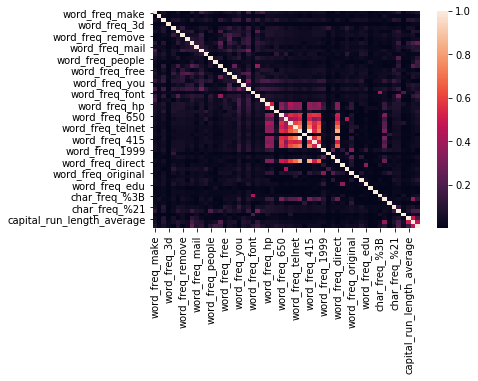

In [6]:
#show correlation
dfcorr = df.corr().abs()
sns.heatmap(dfcorr)

In [0]:
#split df to dfTarget and dfFeature
dfTarget = df['class']
dfFeature = df.drop('class',axis=1)

In [8]:
print('df: ',df.shape)
print('dfFeature: ',dfFeature.shape)
print('dfTarget: ',dfTarget.shape)

df:  (4601, 58)
dfFeature:  (4601, 57)
dfTarget:  (4601,)


In [0]:
#standarisasi nilai pada seluruh atribut/fitur dataframe untuk proses pca
from sklearn.preprocessing import StandardScaler
dfStdFeature = StandardScaler().fit_transform(dfFeature)

In [10]:
#reduksi dimensi dengan pca
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponentsModel = pca.fit_transform(dfStdFeature)

dfPcaFeature = pd.DataFrame(data = principalComponentsModel, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
dfPcaFeature

,pc1,pc2,pc3,pc4
0,-0.731749,-0.042920,-0.576496,0.274330
1,-1.185085,2.067765,0.037593,-0.447727
2,-1.467594,5.023323,3.282553,-0.956861
3,-0.805349,0.427545,-0.584839,-0.004105
4,-0.806281,0.426789,-0.586896,-0.004123
...,...,...,...,...
4596,-0.454406,-0.740288,-0.143859,0.269080
4597,-0.780016,-0.636775,-1.093624,-0.429482
4598,-0.261877,-0.417856,0.342567,-0.115952
4599,-0.589826,-0.661590,-0.582450,0.156262


In [11]:
dfFinal = pd.concat([dfPcaFeature, dfTarget], axis = 1)
dfFinal.head()

,pc1,pc2,pc3,pc4,class
0,-0.731749,-0.042920,-0.576496,0.274330,yes
1,-1.185085,2.067765,0.037593,-0.447727,yes
2,-1.467594,5.023323,3.282553,-0.956861,yes
3,-0.805349,0.427545,-0.584839,-0.004105,yes
4,-0.806281,0.426789,-0.586896,-0.004123,yes


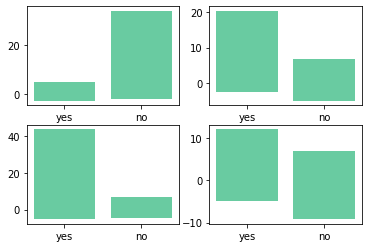

In [12]:

fig,a =  plt.subplots(2,2)
a[0][0].bar(dfFinal['class'], dfFinal['pc1'], color='#69cba1')
a[0][1].bar(dfFinal['class'], dfFinal['pc2'], color='#69cba1')
a[1][0].bar(dfFinal['class'], dfFinal['pc3'], color='#69cba1')
a[1][1].bar(dfFinal['class'], dfFinal['pc4'], color='#69cba1')

plt.show()

In [0]:
#split data 70% train, 30% test
from sklearn.model_selection import train_test_split

dfTrain_x, dfTest_x, dfTrain_y, dfTest_y = train_test_split( dfPcaFeature, dfTarget, test_size=1/7.0, random_state=0)

In [0]:
#import and create logit from trained data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(dfTrain_x, dfTrain_y)
dfTest_yprec = logisticRegr.predict(dfTest_x)

In [15]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[-1.11230758  1.56152967  0.03681449  0.56356679]]
[-0.80822364]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(dfTest_y,dfTest_yprec))

              precision    recall  f1-score   support

          no       0.89      0.93      0.91       384
         yes       0.89      0.84      0.86       274

    accuracy                           0.89       658
   macro avg       0.89      0.88      0.89       658
weighted avg       0.89      0.89      0.89       658



In [17]:
logisticRegr.score(dfTest_x, dfTest_y)

0.8905775075987842

In [0]:
dfTest_yprec = pd.Series(dfTest_yprec)
dfTest_yprec = dfTest_yprec.astype('category')

In [0]:
dfTest_x.reset_index(drop=True, inplace=True)
dfTest_yprec.reset_index(drop=True, inplace=True)
dfTest_y.reset_index(drop=True, inplace=True)

In [0]:
dfPredicted = pd.concat([dfTest_x, dfTest_yprec], axis = 1)
dfActual = pd.concat([dfTest_x, dfTest_y], axis = 1)
dfTrain = pd.concat([dfTrain_x, dfTrain_y], axis = 1)

dfPredicted.columns = ['pc1','pc2','pc3','pc4','spam']
dfActual.columns = ['pc1','pc2','pc3','pc4','spam']
dfTrain.columns = ['pc1','pc2','pc3','pc4','spam']

In [0]:
#dfPredicted

In [0]:
#dfActual

In [0]:
#dfTrain

In [21]:
dfActual['spam'].value_counts()

no     384
yes    274
Name: spam, dtype: int64

In [25]:
dfPredicted['spam'].value_counts()

no     402
yes    256
Name: spam, dtype: int64

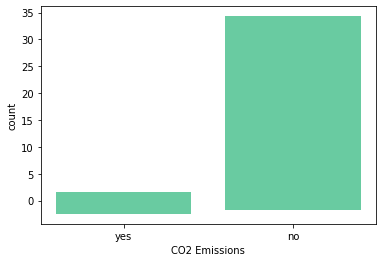

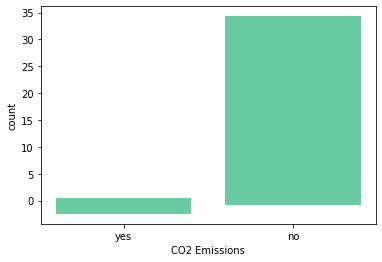

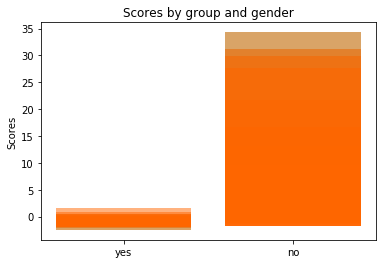

In [34]:
plt.bar(dfActual['spam'], dfActual['pc1'], color='#69cba1')
plt.xlabel("CO2 Emissions")
plt.ylabel("count")
plt.show()
plt.bar(dfPredicted['spam'], dfPredicted['pc1'], color='#69cba1') 
plt.xlabel("CO2 Emissions") 
plt.ylabel("count") 
plt.show()
width = 0.35 
plt.bar(dfPredicted['spam'], dfPredicted['pc1'], color='#69cba1', alpha = 0.5) 
plt.bar(dfActual['spam'], dfActual['pc1'], color='#ff6600', alpha = 0.5) 
plt.ylabel('Scores') 
plt.title('Scores by group and gender') 
plt.show()